In [70]:
# -*- coding: utf-8 -*-
from pandas import read_csv, DataFrame
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from itertools import product
import warnings
from sklearn.metrics import r2_score

import pandas as pd
import numpy as np
from scipy import stats

import statsmodels.api as sm

def invboxcox(x, lmbda = 0):
    if lmbda == 0:
        return(np.exp(x))
    else:
        return(np.exp(np.log(lmbda * x + 1) / lmbda))

In [71]:
def statTest(dataset, flag):
    test = sm.tsa.adfuller(dataset.iloc[:,0].values, autolag='AIC' )
    if test[0] > test[4]['5%']:
        if (flag):
            print 'Есть единичные корни, ряд не стационарен'
        return False
    else:
        if (flag):
            print 'Единичных корней нет, ряд стационарен'
        return True

In [72]:
def iOrder(dataset):
    print_flag = 0
    order = 0
    while not statTest(dataset, print_flag):
        dataset = dataset.diff()
        dataset.dropna(inplace = True)
        order += 1
    return order

In [73]:
dataset = read_csv('training.csv',
                     ',',
                     index_col=['Date'],
                     parse_dates=['Date'],
                     dayfirst=True)

In [74]:
def plotMovingAverage(dataset, n):
    rolling_mean = dataset.rolling(window=n).mean()
    rolling_std = dataset.rolling(window=n).std()
    plt.figure(figsize=(15,7))
    plt.plot(rolling_mean, color = "g", label="Rolling mean trend. Size = {}".format(n))
    plt.plot(rolling_std, color = "grey", label="Rolling std. Size = {}".format(n))
    plt.plot(dataset.Value, label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)
    plt.show()

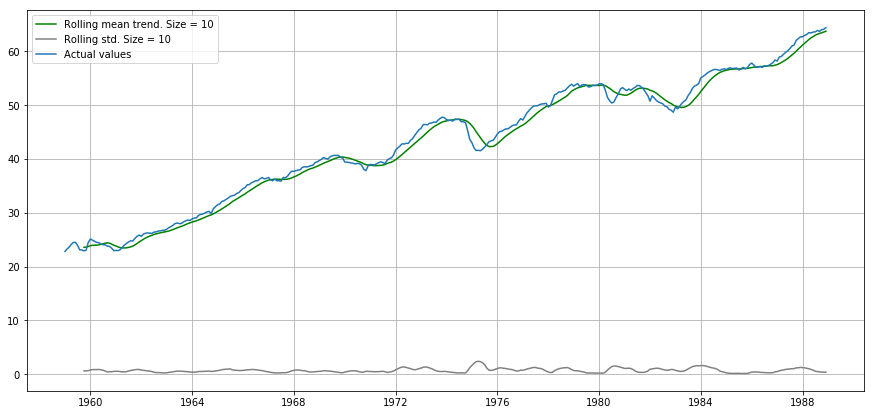

In [75]:
plotMovingAverage(dataset, 10)

In [76]:
statTest(dataset, 1)

Есть единичные корни, ряд не стационарен


False

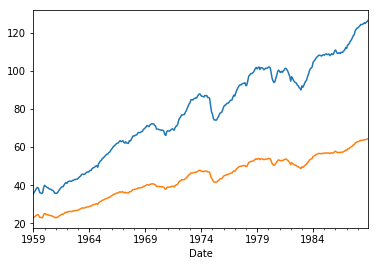

In [77]:
dataset['Value_box'], lmbda = stats.boxcox(dataset.Value)
dataset.Value_box.plot()
dataset.Value.plot()
plt.show()

Order of integration =  1


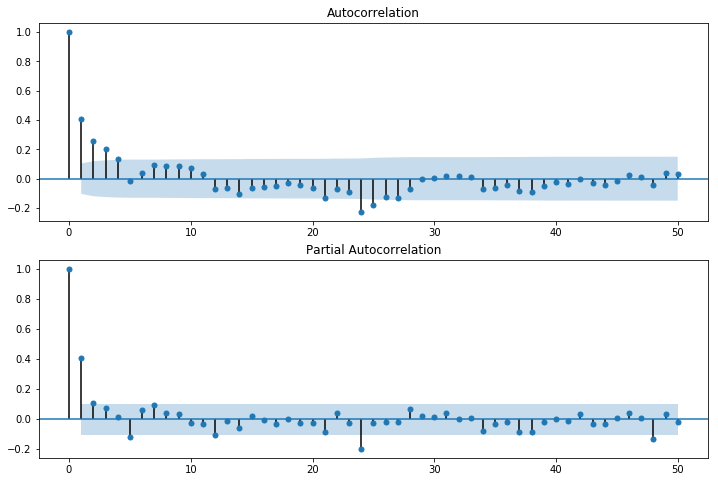

In [78]:
d = iOrder(dataset)
print 'Order of integration = ', d

for i in range (0, d):
    dataset = dataset.diff()
    dataset.dropna(inplace = True)

lag_acf = acf(dataset.Value, nlags=50)
lag_pacf = pacf(dataset.Value, nlags=50, method='ols')

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dataset.Value, lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dataset.Value, lags=50, ax=ax2)

plt.show()

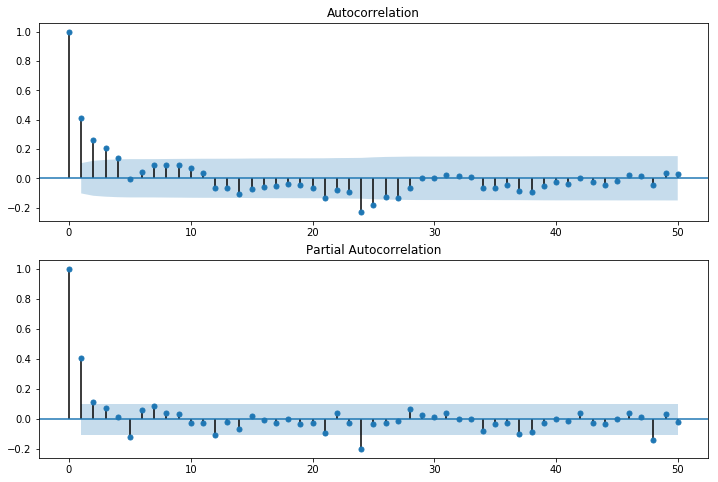

In [79]:
lag_acf = acf(dataset.Value_box, nlags=50)
lag_pacf = pacf(dataset.Value_box, nlags=50, method='ols')

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dataset.Value_box, lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dataset.Value_box, lags=50, ax=ax2)

plt.show()